# Problem Set 2
Programming part adapted from [Stanford CS231n](http://cs231n.stanford.edu/).

**Name : `Kousshik Raj`** 

**Roll-No : `17CS30022`** 

**Dept : `Computer Science and Engineering`** 

**Mail-ID : `kousshikraj.raj@gmail.com`** 

## Preamble
- Have a working Python3 installation.
- The zip file you've downloaded contains the `cs60010s2` codebase that you need to complete as instructed for P4.
- The code for loading the MNIST dataset requires the `scikit-learn` package. If you previously did not do the Anaconda installation to set up your Python environment, you can install it following the instructions here: http://scikit-learn.org/stable/install.html
- Be sure to show **all your steps** in derivations!

We highly encourage students to put down their derivations into corresponding cells below. However, if one does not know LaTeX (and would find it too hard to learn it by looking at examples listed below between \$..\$), he or she might pass it in pen-and-paper format, however grading of these submissions might be delayed.

Put your solution into boxes marked with **`[double click here to add a solution]`**

**Submission instructions:**<br>
Please upload your completed solution file to [CSE Moodle](https://10.5.18.110/moodle/login/index.php) by the due date (see Schedule). If you have pen-and-paper answers, please hand them in in class on the same day. **`[ NOTE: You might need to bypass proxy for 10.5.18.110 in order to access the moodle.]`**

## Problem 1: Cross-Entropy and Softmax
This problem asks you to derive the cross-entropy loss for a multiclass classification problem using maximum likelihood.
Consider the multiclass classification problem in which each input is assigned to one of $K$ mutually exclusive classes. The binary target variables $y_k$ ∈ {0, 1} have a "one-hot" coding scheme, where the value is 1 for the indicated class and 0 for all others. This means that the label vector is a $K$ length vector where only one entry is 1, rest are 0. Assume that we can interpret the network outputs as $h_k(x,\theta) = p(y_k = 1|x)$, or the probability of the kth class, where $h$ is a $K$ length vector and $h_k$ is the $k^{th}$ element of that vector.

**Q1.1**: Show that the maximum likelihood estimate of the parameters $\theta$ can be obtained by minimizing the multiclass **cross-entropy** loss function 
<p>
$L(\theta)= - \frac{1}{N}\sum_{i=1}^{N} \sum_{k=1}^{K} y_{ik} \log(h_k(x_i,\theta))$
</p>
<p>
where $N$ is the number of examples $\{x_i,y_i\}$. </p>

**Solution**

$ p(y_i|x_i) = \displaystyle\prod_{k=1}^{K}p(y_{ik} = 1 | x_i )^{y_{ik}} $

$ \implies p(Y|X) = \displaystyle\prod_{i=1}^{N}\prod_{k=1}^{K}p(y_{ik} = 1 | x_i )^{y_{ik}} $

$ \implies p(Y|X) = \displaystyle\prod_{i=1}^{N}\prod_{k=1}^{K}h_k(x_i,\theta)^{y_{ik}} $

$ \implies \log{p(Y|X)} = \displaystyle\sum_{i=1}^{N}\sum_{k=1}^{K} y_{ik} \log(h_k(x_i,\theta)) $

$ \implies \theta_{MLE} = \displaystyle\underset{\theta}{\operatorname{argmax}}\log{p(Y|X)} $

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;$ =  \displaystyle\underset{\theta}{\operatorname{argmin}}\frac{-\log{p(Y|X)}}{N} $

$ \implies \theta_{MLE} = \displaystyle\underset{\theta}{\operatorname{argmin}}- \frac{1}{N}\sum_{i=1}^{N} \sum_{k=1}^{K} y_{ik} \log(h_k(x_i,\theta)) $


$ From \ this,\ we\ can\ see\ that,\ \theta_{MLE}\ can\ be\ obtained\ by\ minimisizing\ L(\theta),\ where $

$L(\theta) = - \frac{1}{N}\sum_{i=1}^{N} \sum_{k=1}^{K} y_{ik} \log(h_k(x_i,\theta))$



**Q1.2**: Assume the penultimate layer outputs raw scores (called logits) for each class $z_k(x,\theta)$ for input $x$. Then the class probabilities can be obtained using **softmax** with **temperature parameter $T>0$**, i.e. 
<p>
$h_k(x,\theta)=\frac{\exp(z_k(x,\theta)/T)}{\sum_{j}exp(z_j(x,\theta)/T)}$. 
</p> 

Consider a single pair $(x,y)$ where $y$ is a one-hot vector, and the corresponding loss $L=-\sum_{k}y_k\log h_k(x,\theta)$. Compute the partial derivative $\frac{\partial L}{\partial z_k(x,\theta)}$. 

<p>
Hint: with the standard softmax ($T=1$) it is known that
$\frac{\partial L}{\partial z_k(x,\theta)}=h_k(x,\theta)-y_{k}$.
</p>

**Solution**

$L=-\displaystyle\sum_{k}y_k\log h_k(x,\theta)$

$L=-\displaystyle\sum_{k}y_k\log{\frac{\exp(z_k(x,\theta)/T)}{\sum_{j}exp(z_j(x,\theta)/T)}}$

$L=-\displaystyle\sum_{i}y_i\log{\exp(z_i(x,\theta)/T)} + \sum_{i}y_i\log{\sum_{j}exp(z_j(x,\theta)/T)}$

$L=-\displaystyle\sum_{i}\frac{y_i z_i(x,\theta)}{T} + \log{\sum_{j}exp(z_j(x,\theta)/T)}\sum_{i}y_i $

$L=-\displaystyle\sum_{i}\frac{y_i z_i(x,\theta)}{T} + \log{\sum_{j}exp(z_j(x,\theta)/T)}\ \ \ \ \text{(Because it is a one-hot vector)}$ 

$\implies \displaystyle\frac{\partial L}{\partial z_k(x,\theta)} = -\frac{y_k}{T} + \frac{exp(z_j(x,\theta)/T)}{T \sum_{j}exp(z_j(x,\theta)/T)}$

$ \implies \boxed{\displaystyle\frac{\partial L}{\partial z_k(x,\theta)}=\frac{h_k(x,\theta)-y_{k}}{T}} $

## Problem 2: Simple Regularization Methods
In learning neural networks we typically minimize a loss function $\mathcal{L}(\theta)$ with respect to the network parameters $\theta$. It is also important that we *regularize* the network to reduce overfitting. A simple and popular regularization strategy is to penalize some *norm* of $\theta$.

**Q2.1**:  L2 regularization

We can penalize the L2 norm of $\theta$: we modify our objective function to be $\mathcal{L}(\theta) + \lambda \|\theta\|^2$ where $\lambda$ is the weight of regularization, and let $g=\frac{\partial \mathcal{L}}{\partial \theta}$. Please derive the update rule for minimizing this objective using gradient descent with step size $\eta$. In other words, at time $t+1$, express the new parameters $\theta_{t+1}$ in terms of the old parameters $\theta_t$, the gradient $g_t$, $\eta$, and $\lambda$.

Hint: this update rule has an additional term compared to standard gradient descent, which is called "weight decay".

**Solution**

$Let \ \mathcal{H}(\theta) = \mathcal{L}(\theta) + \lambda \|\theta\|^2$

$ \displaystyle\frac{\partial\mathcal{H}}{\partial\theta} = \frac{\partial\mathcal{L}}{\partial\theta} + 2\lambda \theta$

&emsp;&emsp;&ensp;$ = g + 2\lambda \theta$

$ \Delta \theta = -\displaystyle \eta \frac{\partial\mathcal{H}}{\partial\theta} $

$ \Delta \theta = -\displaystyle \eta (g_t + 2\lambda \theta_t) $

$ \theta_{t+1} = \theta_t + \Delta \theta $

$ \implies \boxed{\displaystyle \theta_{t+1} = \theta_t(1 - 2\eta\lambda)-\eta g_t} $

**Q2.2**:  L1 regularization

Now let's consider L1 regularization: our objective in this case is $\mathcal{L}(\theta) + \lambda \|\theta\|_1$. Derive the update rule. This leads to a different form of weight decay.

(Technically this becomes Stochastic *Sub-Gradient* Descent since the L1 norm is not differentiable at 0. But practically it is usually not an issue.)

**Solution**

$Let \ \mathcal{H}(\theta) = \mathcal{L}(\theta) + \lambda \|\theta\|_1$

$ \displaystyle\frac{\partial\mathcal{H}}{\partial\theta} = \frac{\partial\mathcal{L}}{\partial\theta} + \lambda .sign(\theta)$

&emsp;&emsp;&ensp;$ = g + \lambda .sign(\theta)$

$ \Delta \theta = -\displaystyle \eta \frac{\partial\mathcal{H}}{\partial\theta} $

$ \Delta \theta = -\displaystyle \eta (g_t + \lambda .sign(\theta_t)) $

$ \theta_{t+1} = \theta_t + \Delta \theta $

$ \implies \boxed{\displaystyle \theta_{t+1} = \theta_t - \eta\lambda \cdot sign(\theta_t)- \eta g_t} $

## Problem 3: Backprop in a simple MLP
This problem asks you to derive all the steps of the backpropagation algorithm for a simple classification network. Consider a fully-connected neural network, also known as a multi-layer perceptron (MLP), with a single hidden layer and a one-node output layer. The hidden and output nodes use an elementwise sigmoid activation function and the loss layer uses cross-entropy loss:
<p>
$f(z)=\frac{1}{1+exp(-z))}$
<br>
$L(\hat{y},y)=-yln(\hat{y}) - (1-y)ln(1-\hat{y})$
</p>
<p>
The computation graph for an example network is shown below. Note that it has an equal number of nodes in the input and hidden layer (3 each), but, in general, they need not be equal. Also, to make the application of backprop easier, we show the <i>computation graph</i> which shows the dot product and activation functions as their own nodes, rather than the usual graph showing a single node for both.
</p>

<img src="mlpgraph.png" style="height:200px;">

The backpropagation algorithm for an MLP is described in **Goodfellow 6.5.4**, and is reproduced below. For simplicity, we will assume no regularization on the weights, so you can ignore the terms involving $\Omega$. The forward step is: 

<img src="forward.png" style="width:500px;">

and the backward step is:

<img src="backward.png" style="width:500px;">

Write down each step of the backward pass explicitly for all layers, i.e. for the loss and $k=2,1$, compute all gradients above, expressing them as a function of variables $x, y, h, W, b$. <br>
<i>Note 1: We have replaced the superscript notation $u^{(i)}$ with $u^i$ <br>
Note 2: You should substitute the updated values for the gradient $g$ in each step and simplify as much as possible.</i> <br>

Specifically, compute the following:

**Q3.1**: $\nabla_{\hat{y}}L(\hat{y},y)$

**Solution**

$L(\hat{y},y)=-yln(\hat{y}) - (1-y)ln(1-\hat{y})$

$\displaystyle\nabla_{\hat{y}}L(\hat{y},y)=-\frac{y}{\hat{y}} + \frac{1-y}{1-\hat{y}}$

$\implies \boxed{\displaystyle\nabla_{\hat{y}}L(\hat{y},y)=\frac{\hat{y}-y}{\hat{y}(1-\hat{y})}} $

**Q3.2**: $\nabla_{a^2}J$
<br><i>Note: In our particular case ${a^2}$ is just ${a_1^{(2)}}$.</i>

**Splution**

$\displaystyle f(z)=\frac{1}{1+exp(-z))}$

$\displaystyle\frac{\partial f(z)}{\partial z} = f(z)(1-f(z)) \ \ \ ..... (1)$

$\displaystyle\nabla_{a^{(2)}}J = \displaystyle\nabla_{a^{(2)}}L(\hat{y}, y)$

&ensp;&ensp;&ensp;&ensp; $ = \displaystyle\frac{\partial\hat{y}}{\partial a^{(2)}} \cdot \nabla_{\hat{y}}L(\hat{y}, y) $

&ensp;&ensp;&ensp;&ensp; $ = \displaystyle\frac{\partial f(a^{(2)})}{\partial a^{(2)}} \cdot \nabla_{\hat{y}}L(\hat{y}, y) $

&ensp;&ensp;&ensp;&ensp; $ = f(a^{(2)})(1-f(a^{(2)}) \cdot \nabla_{\hat{y}}L(\hat{y}, y) $

&ensp;&ensp;&ensp;&ensp; $ = \displaystyle\hat{y}(1-\hat{y}) \cdot \frac{\hat{y}-y}{\hat{y}(1-\hat{y})} $

$ \implies \boxed{\displaystyle\nabla_{a^{(2)}}J = \hat{y}-y} $

**Q3.3**: $\nabla_{b^2}J$

**Solution**

$ a^{(2)} = {W^{(2)}}\cdot h^{(1)} + b^{(2)} $ 

$ \displaystyle{\frac{\partial a^{(2)}}{\partial b^{(2)}}} = 1 $

$\nabla_{b^{(2)}}J = \displaystyle{\frac{\partial a^{(2)}}{\partial b^{(2)}}} \cdot \nabla_{a^{(2)}}J$

&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; $ = 1 \cdot (\hat{y}-y)$

$ \implies \boxed{\displaystyle\nabla_{b^{(2)}}J = \hat{y}-y} $

**Q3.4**: $\nabla_{W^2}J$ <br><i>Note: This should be a vector, since $W^{(2)}$ is a vector. </i>

**Solution**

$ a^{(2)} = {W^{(2)}}\cdot h^{(1)} + b^{(2)} $ 

$ \displaystyle{\frac{\partial a^{(2)}}{\partial W^{(2)}}} = h^{(1)} $

$\nabla_{W^{(2)}}J = \displaystyle{\frac{\partial a^{(2)}}{\partial W^{(2)}}}^T \cdot \nabla_{a^{(2)}}J$

&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; $ = h^{(1)T} \cdot (\hat{y}-y)$

$ \implies \boxed{\displaystyle\nabla_{W^{(2)}}J = h^{(1)T} \cdot (\hat{y}-y)} $

**Q3.5**: $\nabla_{h^1}J$ 
<br><i>Note: Here ${h^1}$ implies the vector [${h_1^{(1)}}, {h_2^{(1)}}, {h_3^{(1)}}$].</i>

**Solution**

$ a^{(2)} = {W^{(2)}} \cdot h^{(1)} + b^{(2)} $ 

$ \displaystyle{\frac{\partial a^{(2)}}{\partial h^{(1)}}} = W^{(2)} $

$\nabla_{h^{(1)}}J = \displaystyle{\frac{\partial a^{(2)}}{\partial h^{(1)}}}^T   \cdot  \nabla_{a^{(2)}}J$

&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; $ = W^{(2)T}  \cdot (\hat{y}-y) $

$ \implies \boxed{\displaystyle\nabla_{h^{(1)}}J = (\hat{y}-y) \cdot W^{(2)T}} $

**Q3.6**: $\nabla_{b^1}J$, $\nabla_{W^1}J$

**Solution**

$ \rightarrow h^{(1)} = f(a^{(1)}) $

&ensp;&ensp;&ensp;$ \nabla_{a^{(1)}}J = \displaystyle\frac{\partial h^{(1)}}{\partial a^{(1)}} \odot \nabla_{h^{(1)}}J $

&ensp;&ensp;&ensp;$ \nabla_{a^{(1)}}J = \displaystyle(f(a^{(1)}))(1-f(a^{(1)})) \odot (\hat{y}-y) \cdot W^{(2)T} $

&ensp;&ensp;&ensp;$ \boxed{\nabla_{a^{(1)}}J = \displaystyle(h^{(1)})\odot (\mathbf{1}-h^{(1)}) \odot (\hat{y}-y) \cdot W^{(2)T}} $

$ \rightarrow a^{(1)} = {W^{(1)}} \cdot h^{(0)} + b^{(1)} $

&ensp;&ensp;&ensp;$ \displaystyle{\frac{\partial a^{(1)}}{\partial b^{(1)}}} = \bf{1} $

&ensp;&ensp;&ensp;$\nabla_{b^{(1)}}J = \displaystyle{\frac{\partial a^{(1)}}{\partial b^{(1)}}}^T \cdot \nabla_{a^{(1)}}J$

$\implies \boxed{\nabla_{b^{(1)}}J = \displaystyle(h^{(1)})\odot (\mathbf{1}-h^{(1)}) \odot ((\hat{y}-y) \cdot W^{(2)T}) }$

$ \rightarrow a^{(1)} = {W^{(1)}} \cdot h^{(0)} + b^{(1)} $

&ensp;&ensp;&ensp;$ \displaystyle{\frac{\partial a^{(1)}}{\partial W^{(1)}}} = h^{(0)} $

&ensp;&ensp;&ensp;$\nabla_{W^{(1)}}J = \displaystyle{\frac{\partial a^{(1)}}{\partial W^{(1)}}}^T \cdot \nabla_{a^{(1)}}J$

$\implies \boxed{\nabla_{W^{(1)}}J = \displaystyle h^{(0)T} \cdot (\hat{y}-y) \cdot W^{(2)T} \odot (h^{(1)})\odot (\mathbf{1}-h^{(1)}) }$

**Q3.7** Briefly, explain how would the computational speed of backpropagation be affected if it did not include a forward pass?

**Solution**

The variables calculated during forward propagation such as $a^{(1)}, h^{(1)} $, etc. are needed while computing the gradients using backpropagation. So, these variables have to be calculated using the appropriate equations, before carrying on with the backpropagation. This decreases the speed of the computation of backpropagation.


## Problem 4 (Programming): Implementing a simple MLP
In this problem we will develop a neural network with fully-connected layers, aka Multi-Layer Perceptron (MLP). We will use it to perform classification on the MNIST dataset. <br>
We will use the class `TwoLayerMLP` in the file `cs60010s2/classifiers/mlp.py` to implement our network. You will need to fill in the code there for all sections marked `TODO`

In [29]:
# setup
from cs60010s2.classifiers.mlp import TwoLayerMLP

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [30]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.
input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model(actv, std=1e-1):
    np.random.seed(0)
    return TwoLayerMLP(input_size, hidden_size, num_classes, std=std, activation=actv)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

X, y = init_toy_data()
print ('X = \n', X)
print ('y = ', y)

X = 
 [[ 16.24345364  -6.11756414  -5.28171752 -10.72968622]
 [  8.65407629 -23.01538697  17.44811764  -7.61206901]
 [  3.19039096  -2.49370375  14.62107937 -20.60140709]
 [ -3.22417204  -3.84054355  11.33769442 -10.99891267]
 [ -1.72428208  -8.77858418   0.42213747   5.82815214]]
y =  [0 1 2 2 1]


### Q4.1 Forward pass
Our 2-layer MLP uses a softmax output layer (standard, $T=1$) and the multiclass cross-entropy loss to perform classification. Both are defined in Problem 1.

Please take a look at method `TwoLayerMLP.loss` in the file `cs60010s2/classifiers/mlp.py`. This function takes in the data and weight parameters, and computes the class scores (or the logits $z_k(x,\theta)$), the loss ($L$), and the gradients on the parameters. 

- Implement the first part of the function to compute `scores` and `loss`. Afterwards, run the following two test cases.
- Note that you will have to re-import the TwoLayerMLP class for any change you make in `cs60010s2/classifiers/mlp.py`. We suggest you simply **re-run the code starting from the Problem 4 Setup cell** after making your changes.

Note 1: **If you're not careful, you could run into numerical underflow/overflow problems with softmax and cross-entropy.** In particular, it involves the [log-sum-exp operation](https://en.wikipedia.org/wiki/LogSumExp) where exponentiated numbers are summed. This can result in underflow/overflow, e.g. getting "nan" (stands for Not A Number) for seemingly ordinary numerical operations. Read about the solution in the link.

Note 2: You're strongly encouraged to implement in a **vectorized** way, by not using `for` loops over either the example index $i$ or class index $k$. `For` loops can be much slower.

In [31]:
net = init_toy_model('sigmoid')
scores = net.loss(X)
print ('(1) Your scores:')
print (scores)
print ()
correct_scores = np.asarray([[-0.20202237, -0.3826274,  -0.37823944],
                             [-0.09999725, -0.29461579, -0.298211  ],
                             [-0.04333782, -0.29038971, -0.3097813 ],
                             [-0.0305597,  -0.26184001, -0.30413287], 
                             [-0.02637045, -0.24190783, -0.29750761]])

# The difference should be very small (< 1e-7)
print ('Difference between your scores and correct scores:')
print (np.sum(np.abs(scores - correct_scores)))
print ()

loss, _ = net.loss(X, y, reg=0.1)
correct_loss = 1.182248

# The difference should be very small (< 1e-7)
print ('(2) Your loss: %f'%(loss))
print ('Difference between your loss and correct loss:')
print (np.sum(np.abs(loss - correct_loss)))

(1) Your scores:
[[-0.20202237 -0.3826274  -0.37823944]
 [-0.09999725 -0.29461579 -0.298211  ]
 [-0.04333782 -0.29038971 -0.3097813 ]
 [-0.0305597  -0.26184001 -0.30413287]
 [-0.02637045 -0.24190783 -0.29750761]]

Difference between your scores and correct scores:
3.399786567201413e-08

(2) Your loss: 1.182248
Difference between your loss and correct loss:
1.9605862711102873e-08


### Q4.2 Backward pass
- Implement the second part to compute gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`, stored in `grads`.

Now debug your backward pass using a numeric gradient check.

In [32]:
# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.
from cs60010s2.utils.gradient_check import eval_numerical_gradient

loss, grads = net.loss(X, y, reg=0.1)

# these should all be very small
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.1)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print ('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W2 max relative error: 1.469025e-09
b2 max relative error: 6.670688e-11
W1 max relative error: 4.785220e-09
b1 max relative error: 2.035406e-06


### Q4.3 Train the Sigmoid network
To train the network we will use stochastic gradient descent (SGD), implemented in `TwoLayerNet.train`. Then we train a two-layer network on toy data.

- Implement the prediction function `TwoLayerNet.predict`, which is called during training to keep track of training and validation accuracy.

You should get the final training loss around 0.1, which is good, but not too great for such a toy problem.  One problem is that the gradient magnitude for W1 (the first layer weights) stays small all the time, and the neural net doesn't get much "learning signals". This has to do with the saturation problem of the sigmoid activation function, discussed in **Goodfellow 6.3.2**. 

Final training loss:  0.10926794610680675


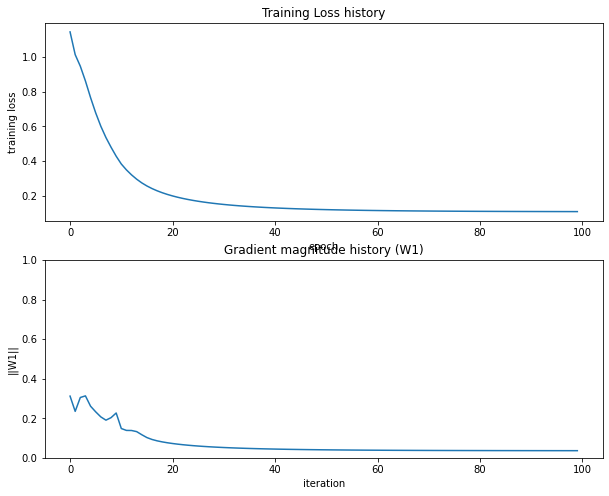

In [33]:
net = init_toy_model('sigmoid', std=1e-1)
stats = net.train(X, y, X, y,
                  learning_rate=0.5, reg=1e-5,
                  num_epochs=100, verbose=False)

print ('Final training loss: ', stats['loss_history'][-1])

# plot the loss history and gradient magnitudes
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.xlabel('epoch')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.subplot(2, 1, 2)
plt.plot(stats['grad_magnitude_history'])
plt.xlabel('iteration')
plt.ylabel('||W1||')
plt.ylim(0,1)
plt.title('Gradient magnitude history (W1)')
plt.show()

### Q4.4 Using softplus activation
In practice, the Rectified Linear Unit (ReLU) and softplus activations are much more successful than sigmoid. In particular, they don't suffer from the saturation problem. 
Now please look at method `TwoLayerMLP.loss`, where we have provided partial implementations for the forward and backward computation for the ReLU activation. 

- Complete the implementation for the **softplus** activation.
- Train the network with softplus, and report your final training loss (see below).

Note: an implementation of the softplus function for scalar inputs was given in problem 1, but here you need to implement a **numerically stable**, and **vectorized** version. 

We do the numerical checks as usual.

In [34]:
net = init_toy_model('softplus', std=1e-1)
scores = net.loss(X)
print ('(1) Your scores:')
print (scores)
print ()
correct_scores = np.asarray([[-0.77980255, -1.38043532, -0.8706494 ],
                             [-0.19887433, -1.22677463, -0.59603118],
                             [-0.39705994, -1.06544023, -0.91229474],
                             [-0.09768135, -0.58642231, -0.63485595],
                             [-0.03301159, -0.34776212, -0.4272356 ]])

# The difference should be very small (< 1e-7)
print ('Difference between your scores and correct scores:')
print (np.sum(np.abs(scores - correct_scores)))
print ()

loss, grads = net.loss(X, y, reg=0.1)
correct_loss = 1.320973

# The difference should be very small (< 1e-7)
print ('(2) Your loss: %f'%(loss))
print ('Difference between your loss and correct loss:')
print (np.sum(np.abs(loss - correct_loss)))
print ()
    
# The differences should all be very small
print ('(3) checking gradients')
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.1)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print ('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

(1) Your scores:
[[-0.77980255 -1.38043532 -0.8706494 ]
 [-0.19887433 -1.22677463 -0.59603118]
 [-0.39705994 -1.06544023 -0.91229474]
 [-0.09768135 -0.58642231 -0.63485595]
 [-0.03301159 -0.34776212 -0.4272356 ]]

Difference between your scores and correct scores:
3.797764722146546e-08

(2) Your loss: 1.320973
Difference between your loss and correct loss:
6.687566278529289e-08

(3) checking gradients
W2 max relative error: 2.684018e-09
b2 max relative error: 1.969851e-11
W1 max relative error: 5.725848e-09
b1 max relative error: 9.342139e-09


Now that it's working, let's train the network. Is the neural net able to get stronger learning signals (i.e. gradients) this time? Report your final training loss; it should be better than what you get with sigmoid. 

You're welcome to try ReLU as well. Should the results be similar to using softplus, or not? Are they actually similar?

Final training loss:  0.018753301594454173


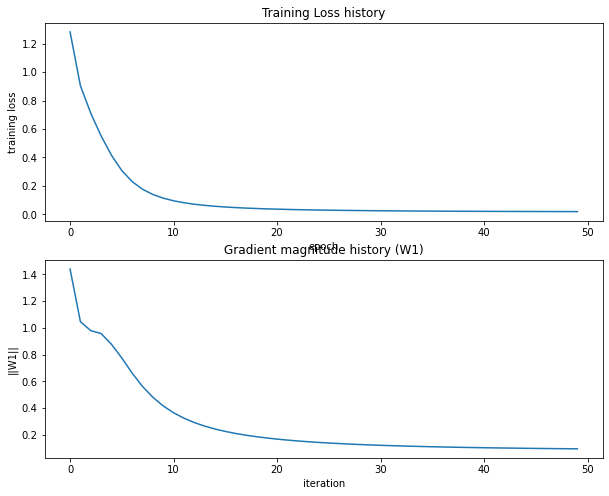

In [35]:
net = init_toy_model('softplus', std=1e-1)
stats = net.train(X, y, X, y,
                  learning_rate=0.1, reg=1e-5,
                  num_epochs=50, verbose=False)

print ('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.xlabel('epoch')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.subplot(2, 1, 2)
plt.plot(stats['grad_magnitude_history'])
plt.xlabel('iteration')
plt.ylabel('||W1||')
plt.title('Gradient magnitude history (W1)')
plt.show()

## Load MNIST data
Now that you have implemented a two-layer network that works on toy data, let's try some real data. The MNIST dataset is a standard benchmark in machine learning. It consists of 70,000 grayscale handwritten digit images, which we split into 50,000 training, 10,000 validation and 10,000 testing. The images are of size 28x28, which are flattened into 784-d vectors.

**Note**: the function `get_MNIST_data` requires the `scikit-learn` package. If you previously did anaconda installation to set up your Python environment, you should already have it. Otherwise, you can install it following the instructions here: http://scikit-learn.org/stable/install.html


In [24]:
# load MNIST
from cs60010s2.utils.data_utils import get_MNIST_data
X_train, y_train, X_val, y_val, X_test, y_test = get_MNIST_data()
print ('Train data shape: ', X_train.shape)
print ('Train labels shape: ', y_train.shape)
print ('Validation data shape: ', X_val.shape)
print ('Validation labels shape: ', y_val.shape)
print ('Test data shape: ', X_test.shape)
print ('Test labels shape: ', y_test.shape)

Train data shape:  (50000, 784)
Train labels shape:  (50000,)
Validation data shape:  (10000, 784)
Validation labels shape:  (10000,)
Test data shape:  (10000, 784)
Test labels shape:  (10000,)


### Q4.5 Train a network on MNIST
We will now train a network on MNIST with 64 hidden units in the hidden layer. We train it using SGD, and decrease the learning rate with an exponential rate over time; this is achieved by multiplying the learning rate with a constant factor `learning_rate_decay` (which is less than 1) after each epoch. In effect, we are using a high learning rate initially, which is good for exploring the solution space, and using lower learning rates later to encourage convergence to a local minimum (or [saddle point](http://www.offconvex.org/2016/03/22/saddlepoints/), which may happen more often).

- Train your MNIST network with 3 different activation functions: sigmoid, softplus, and ReLU. Compare their performances.
- Which activation function would you choose in practice? Why?

We first define some variables and utility functions. The `plot_stats` function plots the hisotories of gradient magnitude, training loss, and accuracies on the training and validation sets. The `visualize_weights` function visualizes the weights learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized. Both functions help you to diagnose the training process.

In [36]:
input_size = 28 * 28
hidden_size = 64
num_classes = 10

# Plot the loss function and train / validation accuracies
def plot_stats(stats):
    plt.subplot(3, 1, 1)
    plt.plot(stats['grad_magnitude_history'])
    plt.title('Gradient magnitude history (W1)')
    plt.xlabel('Iteration')
    plt.ylabel('||W1||')
    plt.ylim(0, np.minimum(100,np.max(stats['grad_magnitude_history'])))
    plt.subplot(3, 1, 2)
    plt.plot(stats['loss_history'])
    plt.title('Loss history')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.ylim(0, 100)
    plt.subplot(3, 1, 3)
    plt.plot(stats['train_acc_history'], label='train') 
    plt.plot(stats['val_acc_history'], label='val')
    plt.title('Classification accuracy history')
    plt.xlabel('Epoch')
    plt.ylabel('Clasification accuracy')
    plt.show()

# Visualize the weights of the network
from cs60010s2.utils.vis_utils import visualize_grid
def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.T.reshape(-1, 28, 28)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

### Q4.5.1 Sigmoid

In [37]:
sigmoid_net = TwoLayerMLP(input_size, hidden_size, num_classes, activation='sigmoid', std=1e-1)

# Train the network
sigmoid_stats = sigmoid_net.train(X_train, y_train, X_val, y_val,
                                  num_epochs=20, batch_size=100,
                                  learning_rate=1e-3, 
                                  learning_rate_decay=0.95,
                                  reg=0.5, verbose=True)
print ()

# Predict on the training set
train_acc = (sigmoid_net.predict(X_train) == y_train).mean()
print ('Sigmoid final training accuracy: ', train_acc)

# Predict on the validation set
val_acc = (sigmoid_net.predict(X_val) == y_val).mean()
print ('Sigmoid final validation accuracy: ', val_acc)

# Predict on the test set
test_acc = (sigmoid_net.predict(X_test) == y_test).mean()
print ('Sigmoid test accuracy: ', test_acc)

Epoch 1: loss 79.695504, train_acc 0.100000, val_acc 0.075100
Epoch 2: loss 50.417637, train_acc 0.100000, val_acc 0.096500
Epoch 3: loss 32.885967, train_acc 0.070000, val_acc 0.117200
Epoch 4: loss 22.204712, train_acc 0.140000, val_acc 0.137400
Epoch 5: loss 15.545503, train_acc 0.120000, val_acc 0.156900
Epoch 6: loss 11.293149, train_acc 0.130000, val_acc 0.144500
Epoch 7: loss 8.539477, train_acc 0.120000, val_acc 0.132500
Epoch 8: loss 6.693753, train_acc 0.170000, val_acc 0.108000
Epoch 9: loss 5.481328, train_acc 0.070000, val_acc 0.076300
Epoch 10: loss 4.626094, train_acc 0.060000, val_acc 0.066900
Epoch 11: loss 4.002584, train_acc 0.100000, val_acc 0.106400
Epoch 12: loss 3.576746, train_acc 0.180000, val_acc 0.140800
Epoch 13: loss 3.266458, train_acc 0.160000, val_acc 0.148700
Epoch 14: loss 3.020065, train_acc 0.200000, val_acc 0.180800
Epoch 15: loss 2.824248, train_acc 0.300000, val_acc 0.237700
Epoch 16: loss 2.692235, train_acc 0.320000, val_acc 0.319900
Epoch 17: l

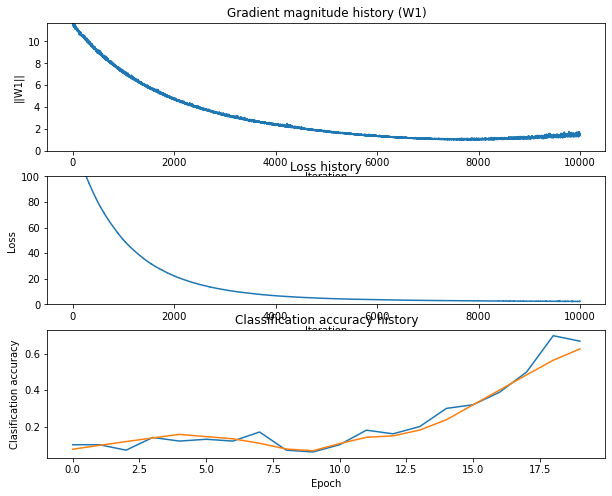

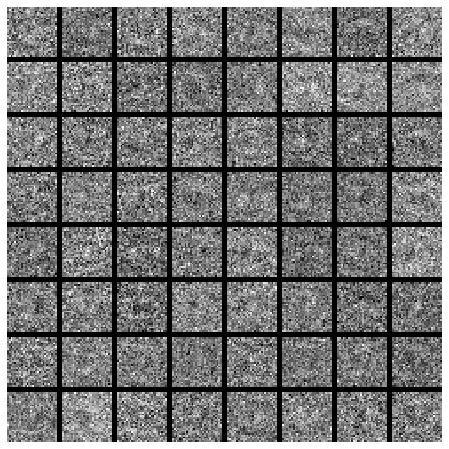

In [38]:
# show stats and visualizations
plot_stats(sigmoid_stats)
show_net_weights(sigmoid_net)

### Q4.5.2 Softplus

Note: **Be careful with potential numerical overflow in your softplus implementation!** The toy example may not have exposed that.

In [39]:
softplus_net = TwoLayerMLP(input_size, hidden_size, num_classes, activation='softplus', std=1e-1)

# Train the network
softplus_stats = softplus_net.train(X_train, y_train, X_val, y_val,
                                    num_epochs=20, batch_size=100, 
                                    learning_rate=1e-3, 
                                    learning_rate_decay=0.95,
                                    reg=0.5, verbose=True)
print

# Predict on the training set
train_acc = (softplus_net.predict(X_train) == y_train).mean()
print ('Softplus final training accuracy: ', train_acc)

# Predict on the validation set
val_acc = (softplus_net.predict(X_val) == y_val).mean()
print ('Softplus final validation accuracy: ', val_acc)

# Predict on the test set
test_acc = (softplus_net.predict(X_test) == y_test).mean()
print ('Softplus test accuracy: ', test_acc)

Epoch 1: loss 79.286281, train_acc 0.850000, val_acc 0.819900
Epoch 2: loss 51.193213, train_acc 0.860000, val_acc 0.852900
Epoch 3: loss 33.793767, train_acc 0.890000, val_acc 0.873500
Epoch 4: loss 23.227466, train_acc 0.890000, val_acc 0.887300
Epoch 5: loss 16.415366, train_acc 0.910000, val_acc 0.895000
Epoch 6: loss 12.006164, train_acc 0.870000, val_acc 0.900000
Epoch 7: loss 8.963835, train_acc 0.910000, val_acc 0.900100
Epoch 8: loss 7.027361, train_acc 0.920000, val_acc 0.903900
Epoch 9: loss 5.553115, train_acc 0.940000, val_acc 0.906000
Epoch 10: loss 4.585724, train_acc 0.910000, val_acc 0.910400
Epoch 11: loss 3.887409, train_acc 0.940000, val_acc 0.911800
Epoch 12: loss 3.274930, train_acc 0.980000, val_acc 0.913700
Epoch 13: loss 2.999839, train_acc 0.940000, val_acc 0.912700
Epoch 14: loss 2.725198, train_acc 0.940000, val_acc 0.914000
Epoch 15: loss 2.434592, train_acc 0.940000, val_acc 0.916500
Epoch 16: loss 2.358398, train_acc 0.930000, val_acc 0.915200
Epoch 17: l

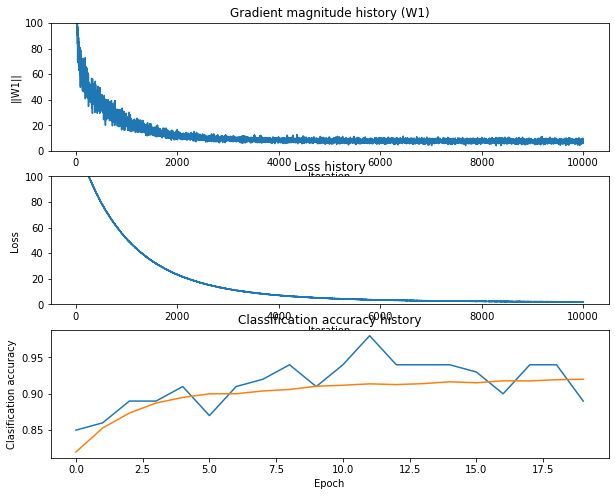

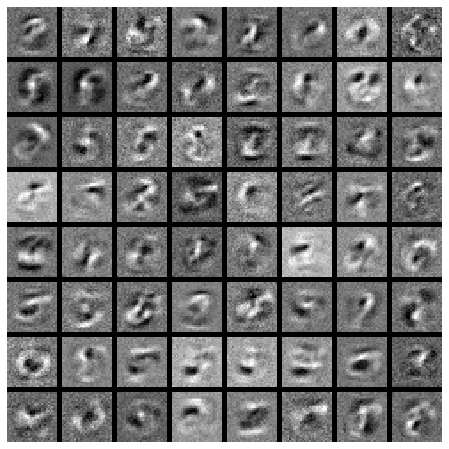

In [40]:
# show stats and visualizations
plot_stats(softplus_stats)
show_net_weights(softplus_net)

### Q4.5.3 ReLU

In [41]:
relu_net = TwoLayerMLP(input_size, hidden_size, num_classes, activation='relu', std=1e-1)

# Train the network
relu_stats = relu_net.train(X_train, y_train, X_val, y_val,
                            num_epochs=20, batch_size=100,
                            learning_rate=1e-3, 
                            learning_rate_decay=0.95,
                            reg=0.5, verbose=True)
print

# Predict on the training set
train_acc = (relu_net.predict(X_train) == y_train).mean()
print ('ReLU final training accuracy: ', train_acc)

# Predict on the validation set
val_acc = (relu_net.predict(X_val) == y_val).mean()
print ('ReLU final validation accuracy: ', val_acc)

# Predict on the test set
test_acc = (relu_net.predict(X_test) == y_test).mean()
print ('ReLU test accuracy: ', test_acc)

/home/thelethalcode/Studies/Sem_6/Deep_Learning/Assignment/PSet2/cs60010s2/classifiers/mlp.py:116: RuntimeWarning: divide by zero encountered in log
  loss = np.mean(-np.log(prob)[range(N),y])


Epoch 1: loss 76.818087, train_acc 0.900000, val_acc 0.879500
Epoch 2: loss 47.540933, train_acc 0.940000, val_acc 0.888700
Epoch 3: loss 29.871523, train_acc 0.950000, val_acc 0.905500
Epoch 4: loss 19.524513, train_acc 0.940000, val_acc 0.921300
Epoch 5: loss 13.035221, train_acc 0.950000, val_acc 0.926600
Epoch 6: loss 8.990676, train_acc 0.930000, val_acc 0.932900
Epoch 7: loss 6.141495, train_acc 0.970000, val_acc 0.941800
Epoch 8: loss 4.526317, train_acc 0.940000, val_acc 0.945300
Epoch 9: loss 3.237318, train_acc 0.980000, val_acc 0.951100
Epoch 10: loss 2.411533, train_acc 0.970000, val_acc 0.954000
Epoch 11: loss 1.849989, train_acc 0.980000, val_acc 0.956900
Epoch 12: loss 1.393501, train_acc 0.990000, val_acc 0.959200
Epoch 13: loss 1.162882, train_acc 0.980000, val_acc 0.958500
Epoch 14: loss 0.994369, train_acc 0.940000, val_acc 0.961100
Epoch 15: loss 0.816464, train_acc 0.970000, val_acc 0.961600
Epoch 16: loss 0.682810, train_acc 0.960000, val_acc 0.962300
Epoch 17: lo

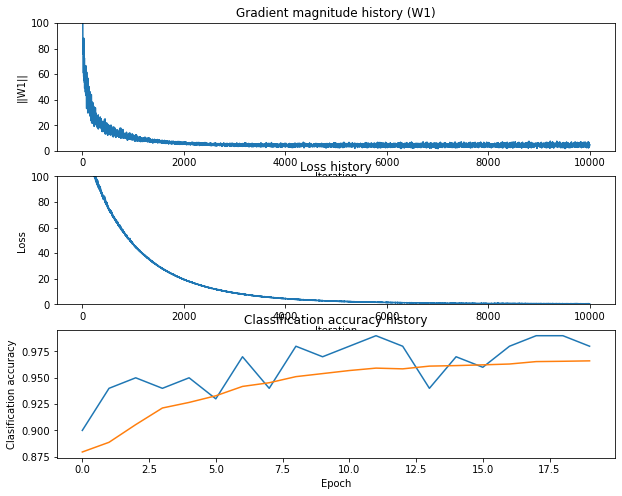

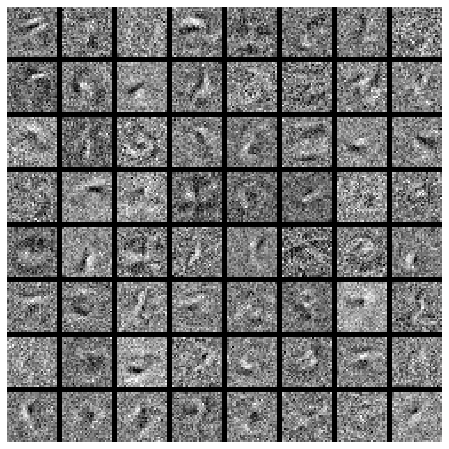

In [42]:
# show stats and visualizations
plot_stats(relu_stats)
show_net_weights(relu_net)